<a href="https://colab.research.google.com/github/keskinus/Data-Analysis-/blob/main/Census_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import urllib.request
import re
import numpy as np
import pandas as pd
import io
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
% matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Augmented_Census.csv to Augmented_Census.csv


In [ ]:
#Read The data.
df1 = pd.read_csv(io.BytesIO(uploaded['Augmented_Census.csv']), sep=',',na_values="?",skipinitialspace=True)



In [ ]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df1.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,47.971241,NaN,152130.535986,11th,5.086115,Never-married,Other-service,Not-in-family,White,Female,29.350117,0.503235,9.505720,United-States,<=50K
1,21.046149,Private,143066.460602,HS-grad,9.015211,Never-married,Farming-fishing,Unmarried,Black,Male,-37.609135,-0.357010,40.101828,United-States,<=50K
2,47.646558,Private,265628.045458,Masters,13.020307,Married-civ-spouse,Prof-specialty,Husband,White,Female,23.536278,0.302747,49.872731,United-States,<=50K
3,47.440548,Self-emp-not-inc,151655.155098,Some-college,12.030251,Married-civ-spouse,NaN,Not-in-family,White,Male,-1.227026,0.459811,39.958886,United-States,<=50K
4,25.985130,Private,300616.115550,Some-college,10.026274,Widowed,Machine-op-inspct,Not-in-family,White,Male,-54.716094,-2.236009,39.972955,France,<=50K
5,54.773266,State-gov,325380.710905,9th,8.993795,Married-civ-spouse,Adm-clerical,Not-in-family,White,Male,-40.739767,0.016466,40.096065,United-States,>50K
6,25.582954,Self-emp-not-inc,130767.182001,Some-college,10.021217,Never-married,Other-service,Own-child,White,Female,-71.460160,-1.776124,19.076328,United-States,<=50K
7,27.917085,Private,137120.834609,Some-college,10.038835,Never-married,Adm-clerical,Not-in-family,White,Female,-55.530329,0.179542,40.009679,United-States,<=50K
8,80.931001,Self-emp-inc,109467.166497,Masters,9.014252,Married-civ-spouse,Prof-specialty,Husband,White,Male,-24.546288,0.469522,40.019828,United-States,>50K
9,34.091211,NaN,100055.677798,Assoc-voc,6.654741,Never-married,NaN,Not-in-family,White,Female,8.128162,-2.067474,30.065576,India,<=50K


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   age             1000000 non-null  float64
 1   workclass       911164 non-null   object 
 2   fnlwgt          1000000 non-null  float64
 3   education       1000000 non-null  object 
 4   education-num   1000000 non-null  float64
 5   marital-status  1000000 non-null  object 
 6   occupation      937519 non-null   object 
 7   relationship    1000000 non-null  object 
 8   race            1000000 non-null  object 
 9   sex             1000000 non-null  object 
 10  capital-gain    1000000 non-null  float64
 11  capital-loss    1000000 non-null  float64
 12  hours-per-week  1000000 non-null  float64
 13  native-country  974459 non-null   object 
 14  income          1000000 non-null  object 
dtypes: float64(6), object(9)
memory usage: 114.4+ MB


In [ ]:
df1.isnull().sum()

age                   0
workclass         88836
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation        62481
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country    25541
income                0
dtype: int64

In [ ]:
df1[["workclass", "occupation", "native-country"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   workclass       911164 non-null  object
 1   occupation      937519 non-null  object
 2   native-country  974459 non-null  object
dtypes: object(3)
memory usage: 22.9+ MB


In [ ]:
df1=df1.dropna()


In [ ]:
df1.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,846473.000000,846473.000000,846473.000000,846473.000000,846473.000000,846473.000000
mean,42.208189,184896.680225,9.852194,424.273722,50.106003,40.182115
std,13.908443,90795.008638,3.115191,2011.993290,304.643848,11.336570
min,15.324212,5803.135963,0.873909,-117.274746,-6.095142,-0.675045
25%,29.558040,115705.862136,8.986605,-20.681551,-1.580383,39.920113
50%,42.082724,173417.901176,9.998182,-2.419251,-0.686593,40.006962
75%,51.295181,249060.627180,12.966647,17.465822,0.235217,40.110320
max,100.855320,805781.124670,16.702453,16739.357490,2724.670991,110.089953


In [ ]:
df1.shape

(846473, 15)

In [ ]:
df1.apply(np.max) 

age                        100.855
workclass              Without-pay
fnlwgt                      805781
education             Some-college
education-num              16.7025
marital-status             Widowed
occupation        Transport-moving
relationship                  Wife
race                         White
sex                           Male
capital-gain               16739.4
capital-loss               2724.67
hours-per-week              110.09
native-country          Yugoslavia
income                        >50K
dtype: object

In [ ]:
cols = [ 'workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex',
      'native-country','income']
for col in cols:
  df1[col] = df1[col].astype('category')

print (df1.dtypes)

In [ ]:
numerical=df1.select_dtypes(include=['float'])
numerical.hist(figsize=(25,20))
plt.title("Distribution of Numerical Values", y=1.015, fontsize=10)

Text(0.5, 1.0, 'Distribution of Income ')

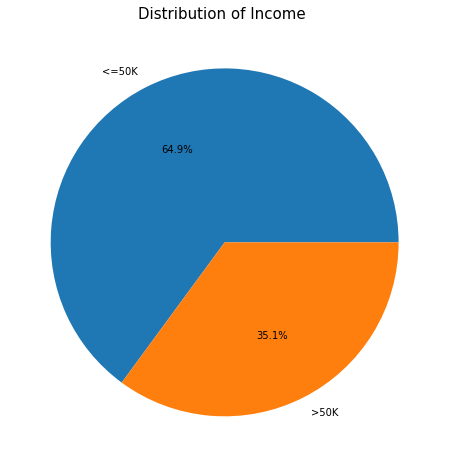

In [ ]:
#Distribution of Income
plt.figure(figsize=(8, 8))
df1['income'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Income ',color = 'black',fontsize = 15)

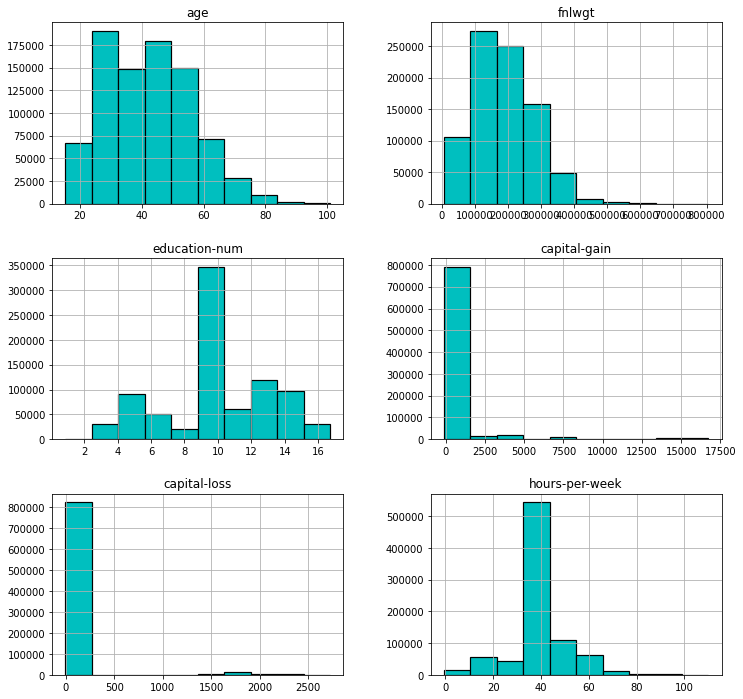

In [ ]:
# Distribution of Different Features of the Dataset
#Histogram of Numerical Values
distribution = df1.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

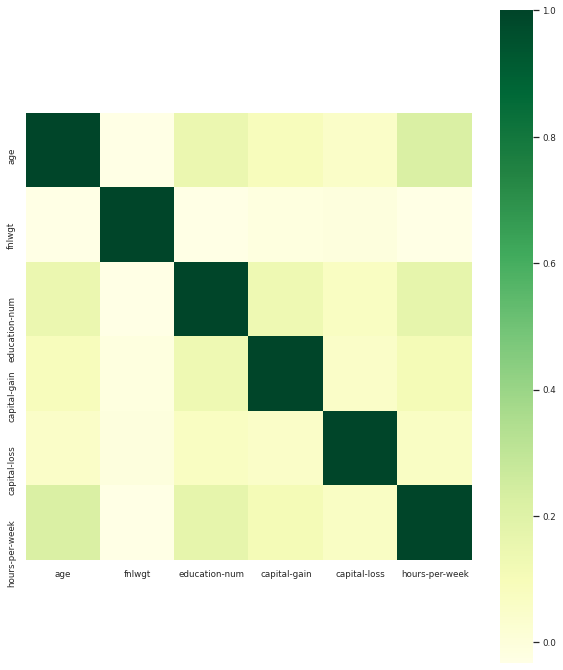

In [ ]:
#Heatmap for Numerical Values
corr=df1.corr()
f, ax=plt.subplots(figsize=(10,12))
cmap=sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, cmap="YlGn", square=1.05)

In [ ]:
df1.drop(columns=["fnlwgt"],inplace=True)

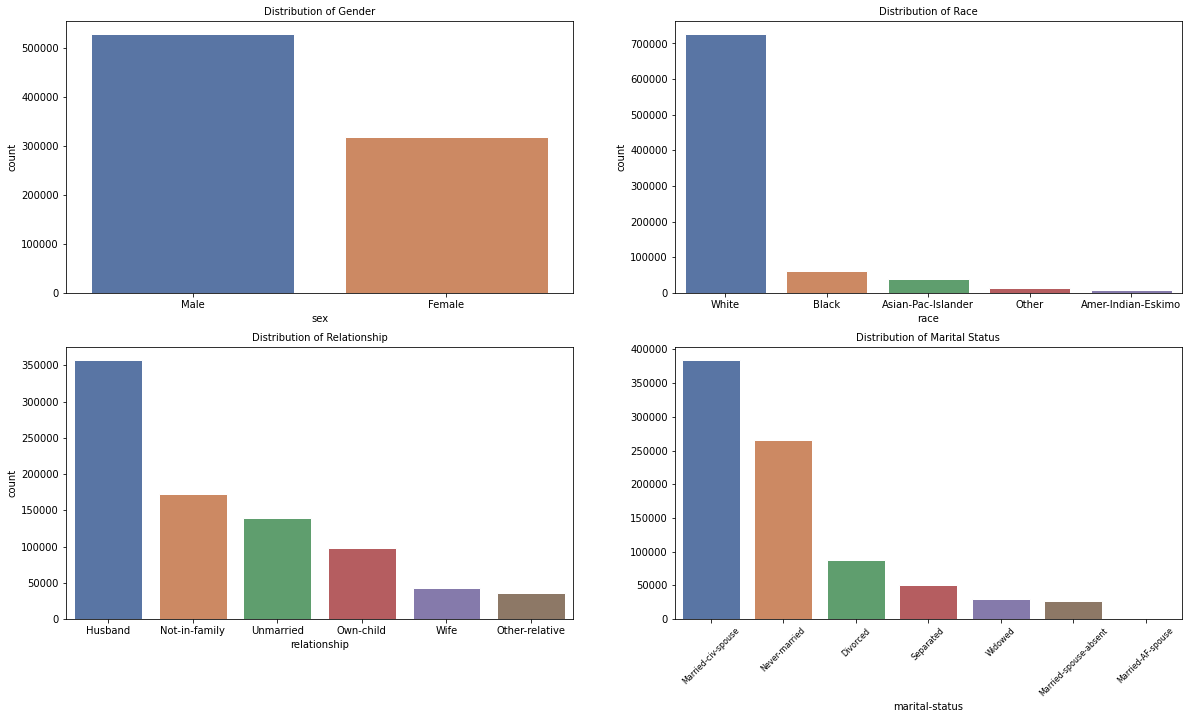

In [ ]:
#Bar Plots of Categorical Variables.
fig, ((a,b),(c,d)) = plt.subplots(2,2,figsize=(20,11))
sns.set(font_scale=0.7)

ax=sns.countplot(df1['sex'],order = df1['sex'].value_counts().index,ax=a)
ax.set_title('Distribution of Gender',fontsize = 10)
plt.xticks(rotation=45, fontsize =8)
plt.ylabel('');

ax=sns.countplot(df1['race'], order = df1['race'].value_counts().index,ax=b)
ax.set_title('Distribution of Race',fontsize = 10)
plt.xticks(rotation=45, fontsize = 8)
plt.ylabel('');

ax=sns.countplot(df1['relationship'],order = df1['relationship'].value_counts().index,ax=c)
ax.set_title('Distribution of Relationship',fontsize = 10)
plt.xticks(rotation=45, fontsize = 8)
plt.ylabel('');

ax=sns.countplot(df1['marital-status'],order = df1['marital-status'].value_counts().index,ax=d)
ax.set_title('Distribution of Marital Status',fontsize = 10)
plt.xticks(rotation=45, fontsize = 8)
plt.ylabel('');


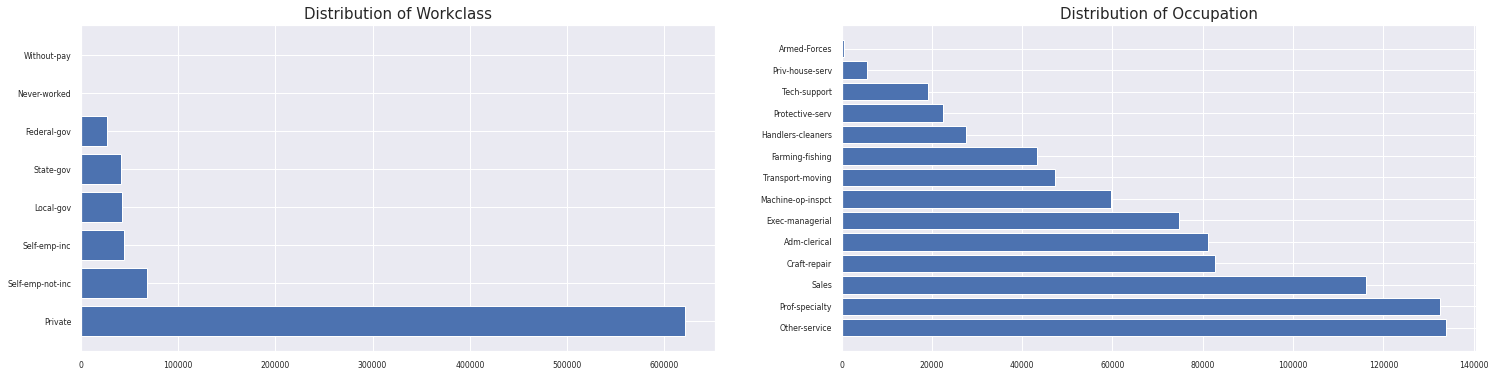

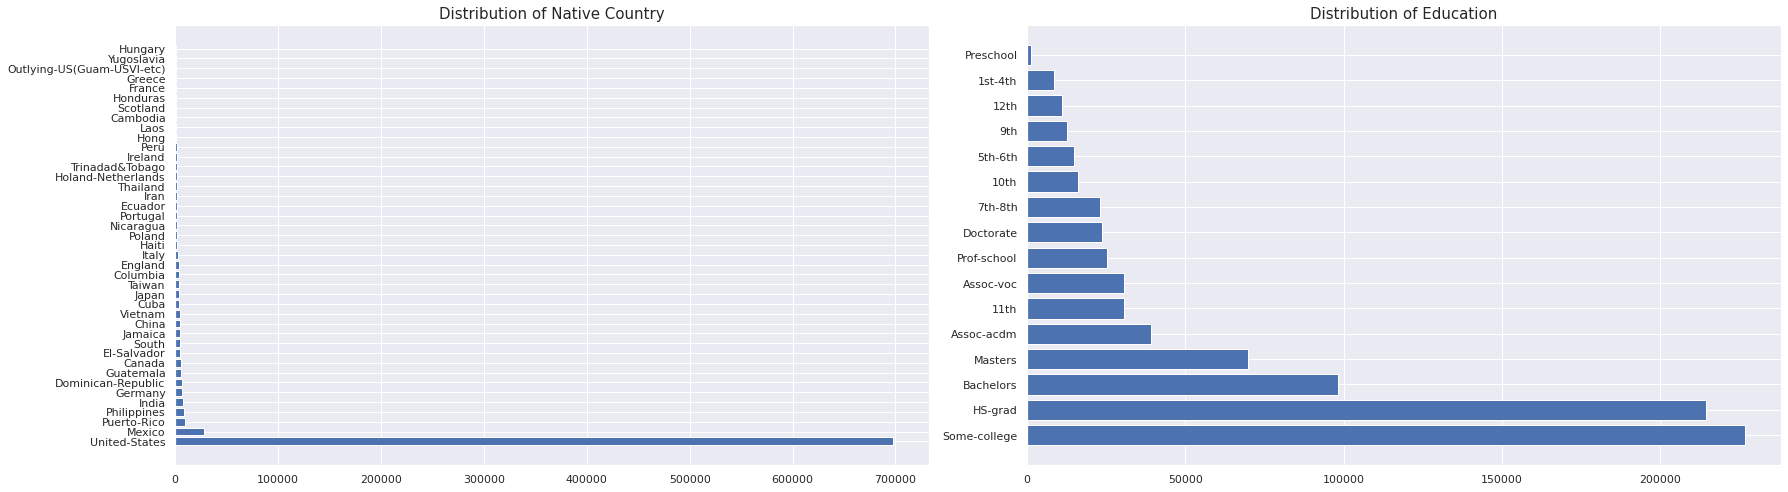

In [ ]:
#Bar Plots of Categorical Variables.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,6))
sns.set(font_scale=1)

ax1.barh(df1['workclass'].value_counts().keys(), df1['workclass'].value_counts().values,)
ax1.set_title('Distribution of Workclass',fontsize = 15)


ax2.barh(df1['occupation'].value_counts().keys(), df1['occupation'].value_counts().values,)
ax2.set_title('Distribution of Occupation',fontsize = 15)

fig, (ax3,ax4) = plt.subplots(1, 2, figsize=(25,7))
ax3.barh(df1['native-country'].value_counts().keys(), df1['native-country'].value_counts().values, )
ax3.set_title('Distribution of Native Country',fontsize = 15)


ax4.barh(df1['education'].value_counts().keys(), df1['education'].value_counts().values,)
ax4.set_title('Distribution of Education',fontsize = 15)

fig.tight_layout()
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
 df1['native-country'].value_counts()

United-States                 698087
Mexico                         27683
Puerto-Rico                     9167
Philippines                     8912
India                           7796
Germany                         6512
Dominican-Republic              6260
Guatemala                       5551
Canada                          5244
El-Salvador                     5105
South                           4548
Jamaica                         4444
China                           4444
Vietnam                         4315
Cuba                            4127
Japan                           4045
Taiwan                          3568
Columbia                        3278
England                         3242
Italy                           2435
Haiti                           2104
Poland                          1870
Nicaragua                       1865
Portugal                        1846
Ecuador                         1720
Iran                            1608
Thailand                        1586
H

In [ ]:
df1['native-country'] = df1['native-country'].apply(lambda x: 'US' if x == 'United-States' else 'Non-US')
df1.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,21.046149,Private,HS-grad,9.015211,Never-married,Farming-fishing,Unmarried,Black,Male,-37.609135,-0.357010,40.101828,US,<=50K
2,47.646558,Private,Masters,13.020307,Married-civ-spouse,Prof-specialty,Husband,White,Female,23.536278,0.302747,49.872731,US,<=50K
4,25.985130,Private,Some-college,10.026274,Widowed,Machine-op-inspct,Not-in-family,White,Male,-54.716094,-2.236009,39.972955,Non-US,<=50K
5,54.773266,State-gov,9th,8.993795,Married-civ-spouse,Adm-clerical,Not-in-family,White,Male,-40.739767,0.016466,40.096065,US,>50K
6,25.582954,Self-emp-not-inc,Some-college,10.021217,Never-married,Other-service,Own-child,White,Female,-71.460160,-1.776124,19.076328,US,<=50K


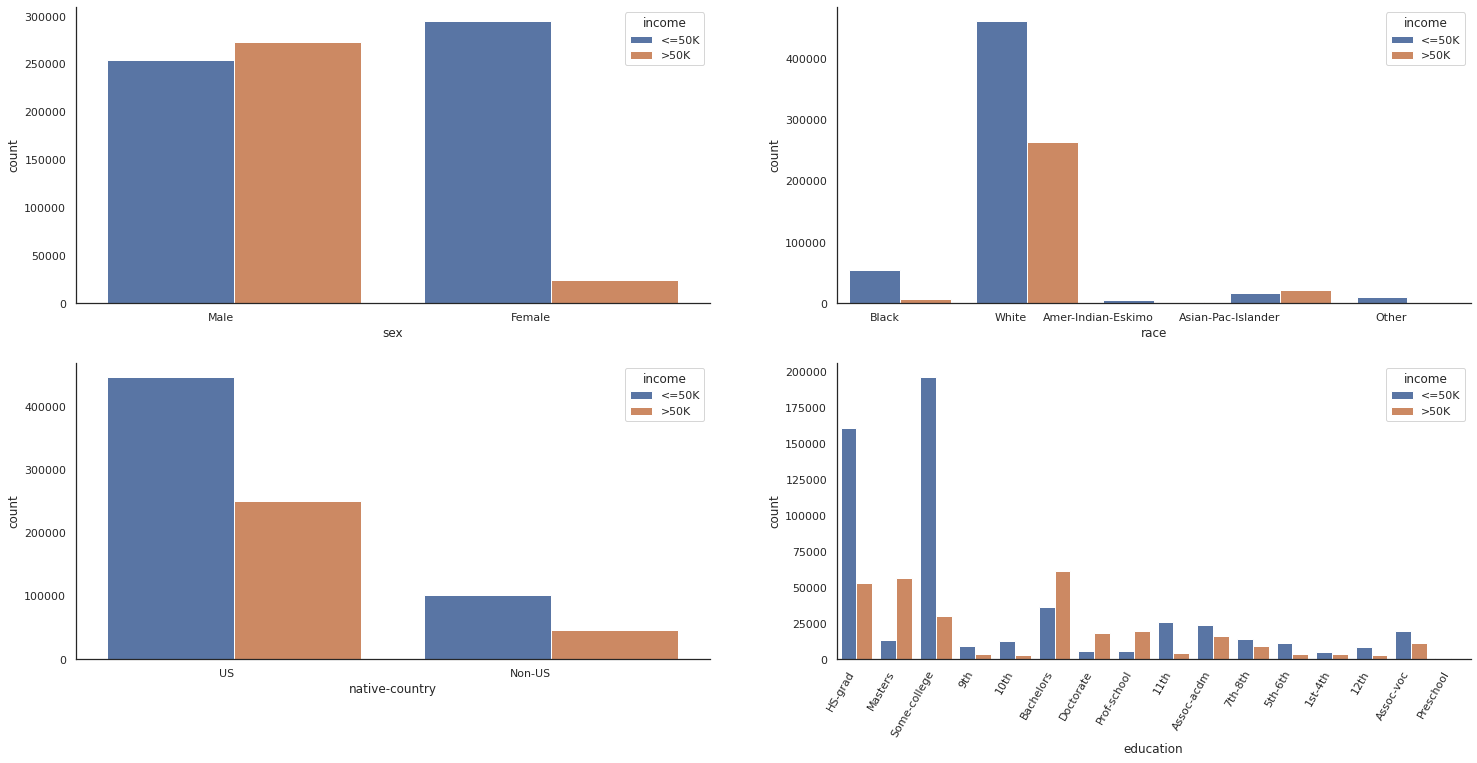

In [ ]:
#Correlation between categorical variables and income.
fig, ((g,h),(l,m))= plt.subplots(2,2,figsize=(25,12))
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(10,4)})
sns.set_style("white")
g = sns.countplot(x="sex",hue="income", data=df1,ax=g)
sns.despine()
g = g.set_xticklabels(g.get_xticklabels(), rotation=0, horizontalalignment='right')

sns.set(rc={'figure.figsize':(10,4)})
sns.set_style("white")
g = sns.countplot(x="race",hue="income", data=df1,ax=h)
sns.despine()
g = g.set_xticklabels(g.get_xticklabels(), rotation=0, horizontalalignment='right')

sns.set(rc={'figure.figsize':(10,4)})
sns.set_style("white")
g = sns.countplot(x="native-country",hue="income", data=df1, ax=l)
sns.despine()
g = g.set_xticklabels(g.get_xticklabels(), rotation=0, horizontalalignment='right')

sns.set(rc={'figure.figsize':(10,4)})
sns.set_style("white")
g = sns.countplot(x="education",hue="income", data=df1,ax=m)
sns.despine()
g = g.set_xticklabels(g.get_xticklabels(), rotation=60, horizontalalignment='right')

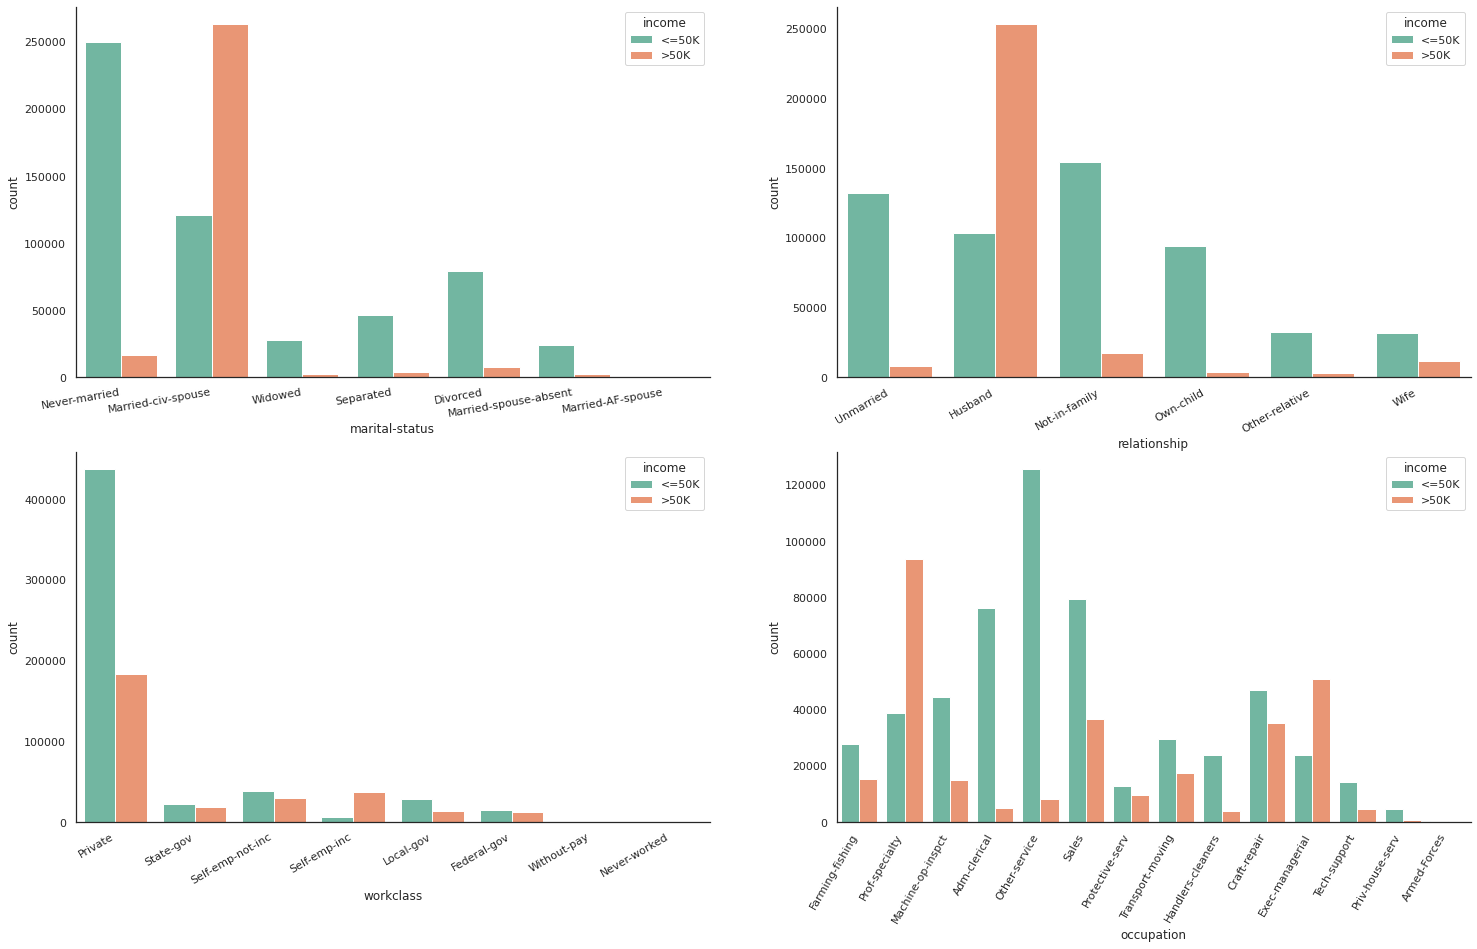

In [ ]:
#Correlation between categorical variables and income.
fig, ((g,h),(l,m))= plt.subplots(2,2,figsize=(25,15))

#sns.set(font_scale=0.6)
#sns.set(rc={'figure.figsize':(10,4)})
sns.set_style("white")
g = sns.countplot(x="marital-status",hue="income", data=df1, palette="Set2",ax=g)
sns.despine()
g = g.set_xticklabels(g.get_xticklabels(), rotation=10, horizontalalignment='right')

sns.set(rc={'figure.figsize':(10,4)})
sns.set_style("white")
g = sns.countplot(x="relationship",hue="income", data=df1, palette="Set2",ax=h)
sns.despine()
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment='right')


sns.set(rc={'figure.figsize':(10,4)})
sns.set_style("white")
g = sns.countplot(x="workclass",hue="income", data=df1, palette="Set2",ax=l)
sns.despine()
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment='right')

sns.set(rc={'figure.figsize':(10,4)})
sns.set_style("white")
g = sns.countplot(x="occupation",hue="income", data=df1, palette="Set2",ax=m)
sns.despine()
g = g.set_xticklabels(g.get_xticklabels(), rotation=60, horizontalalignment='right')


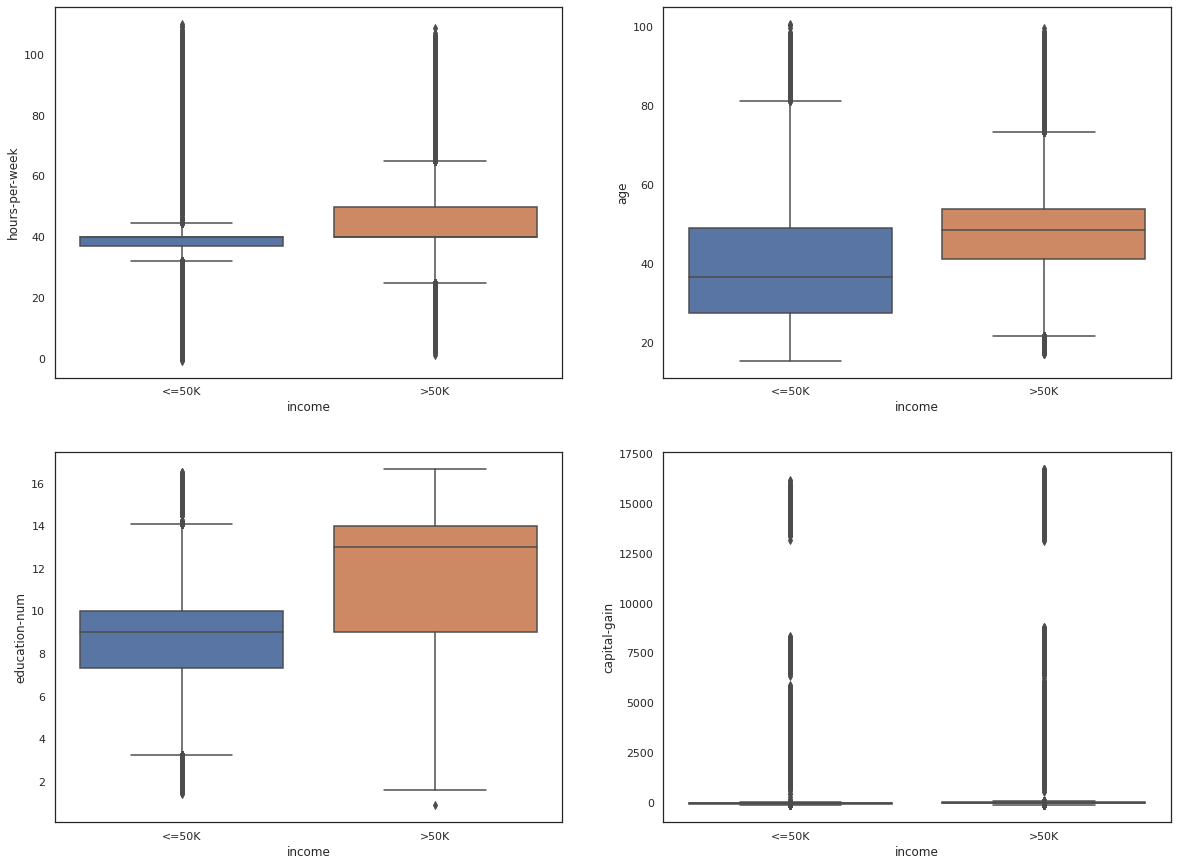

In [ ]:
#Correlation between numerical variables and income.
fig, ((a,b),(c,d)) = plt.subplots(2,2,figsize=(20,15))
sns.boxplot(y='hours-per-week',x='income',data=df1,ax=a)
sns.boxplot(y='age',x='income',data=df1,ax=b)
sns.boxplot(y='education-num',x='income',data=df1,ax=c)
sns.boxplot(y='capital-gain',x='income',data=df1,ax=d)

# **Conclusion **



* The biggest indicator of a citizen earning more than $ 50,000 
is that her/his marital status is ‘married’.
*   It is clearly demonstrated that the higher education  has a high income.


* Occupations that need higher education such as manager / manager, professional / expertise, and technical support positions also have a positive impact on their odds of earning more than $ 50,000.
*    Low-income age is positively skewed, but most high-income people are middle age.


In [ ]:
df1['occupation'].value_counts()

Other-service        133759
Prof-specialty       132502
Sales                116135
Craft-repair          82620
Adm-clerical          81254
Exec-managerial       74741
Machine-op-inspct     59598
Transport-moving      47315
Farming-fishing       43251
Handlers-cleaners     27632
Protective-serv       22523
Tech-support          19130
Priv-house-serv        5514
Armed-Forces            499
Name: occupation, dtype: int64

In [ ]:
df1['workclass'].value_counts()

Private             620864
Self-emp-not-inc     68501
Self-emp-inc         44127
Local-gov            42899
State-gov            41588
Federal-gov          27416
Never-worked           563
Without-pay            515
Name: workclass, dtype: int64

In [ ]:
x=df1[['occupation','workclass']]
x.head(15)

,occupation,workclass
1,Farming-fishing,Private
2,Prof-specialty,Private
4,Machine-op-inspct,Private
5,Adm-clerical,State-gov
6,Other-service,Self-emp-not-inc
7,Adm-clerical,Private
8,Prof-specialty,Self-emp-inc
10,Other-service,Private
11,Sales,Private
12,Adm-clerical,Private


In [ ]:
df1.groupby("workclass").max()

,age,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
workclass,,,,,,,,,,,,,
Federal-gov,99.725384,Some-college,16.554656,Widowed,Transport-moving,Wife,White,Male,16696.071207,2532.713232,104.524113,US,>50K
Local-gov,97.446996,Some-college,16.624417,Widowed,Transport-moving,Wife,White,Male,16271.400860,2529.857780,107.015515,US,>50K
Never-worked,88.887663,Some-college,15.989707,Widowed,Transport-moving,Wife,White,Male,14269.057379,2094.522436,100.074556,US,>50K
Private,100.855320,Some-college,16.702453,Widowed,Transport-moving,Wife,White,Male,16693.026978,2724.670991,110.089953,US,>50K
Self-emp-inc,99.064784,Some-college,16.672544,Widowed,Transport-moving,Wife,White,Male,16739.357490,2518.002195,105.855690,US,>50K
Self-emp-not-inc,98.680881,Some-college,16.481984,Widowed,Transport-moving,Wife,White,Male,16519.976596,2611.969350,106.748797,US,>50K
State-gov,99.764328,Some-college,16.567850,Widowed,Transport-moving,Wife,White,Male,16397.794304,2537.214998,108.752012,US,>50K
Without-pay,87.407604,Some-college,16.181357,Widowed,Transport-moving,Wife,White,Male,14834.659184,2208.642319,95.051328,US,>50K


Find the maximum age of races?

In [ ]:
pd.pivot_table(df1, index=["race"], values=['age'], aggfunc=[max, min, np.mean, np.median, np.std])


,max,min,mean,median,std
,age,age,age,age,age
race,,,,,
Amer-Indian-Eskimo,92.607404,16.222717,40.447378,39.013064,13.938964
Asian-Pac-Islander,97.740212,16.060707,45.892030,47.168832,12.737826
Black,98.286893,15.683531,38.180602,34.358212,14.240075
Other,94.255857,16.824041,42.242191,40.973629,13.971505
White,100.855320,15.324212,42.368149,42.427740,13.861324


In [ ]:
income_agg = pd.pivot_table(df1, index=["income"],values=['age'], aggfunc=[max, min, np.mean, np.median, np.std])
income_agg

,max,min,mean,median,std
,age,age,age,age,age
income,,,,,
<=50K,100.855320,15.324212,38.924647,36.383824,14.207877
>50K,99.725384,16.927616,48.285549,48.549776,10.998787


In [ ]:
mean_age = df1.groupby("marital-status")["age"].agg(["count", "mean"])
mean_age

,count,mean
marital-status,,
Divorced,87648,40.323131
Married-AF-spouse,727,39.990148
Married-civ-spouse,383962,47.763869
Married-spouse-absent,26671,40.690640
Never-married,266007,35.462329
Separated,51012,40.689362
Widowed,30446,40.436615


In [ ]:
pd.crosstab(df1['income'], df1['education'], values=df1['age'], aggfunc=np.mean).T

income,<=50K,>50K
education,,
10th,37.193173,46.803330
11th,37.406140,46.347704
12th,39.525175,47.127041
1st-4th,40.629114,47.897369
5th-6th,40.778902,47.165151
7th-8th,40.722253,47.642599
9th,39.204900,46.999468
Assoc-acdm,40.290270,47.977102
Assoc-voc,40.572315,47.989793


In [ ]:
df1['education'].value_counts()

Some-college    226937
HS-grad         214438
Bachelors        98258
Masters          69644
Assoc-acdm       39292
11th             30611
Assoc-voc        30584
Prof-school      25234
Doctorate        23723
7th-8th          23044
10th             15930
5th-6th          14958
9th              12731
12th             11178
1st-4th           8595
Preschool         1316
Name: education, dtype: int64

In [ ]:
df1["sex"].value_counts()

Male      527600
Female    318873
Name: sex, dtype: int64

In [ ]:
What is the average age (age feature) of women and men ?

In [ ]:
df1[df1['sex'] == 'Female']['age'].mean()

36.76276087655573

In [ ]:

df1[df1['sex']=='Male'].age.mean()

45.499318093802295

In [ ]:

df1[df1['marital-status']=='Married-civ-spouse'].age.mean()

47.76386937506062

In [ ]:
df1['income']=df1['income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
df1['income'] = df1['income'].apply(lambda x: 0 if x == '<=50K' else 1)
df1.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,21.046149,Private,HS-grad,9.015211,Never-married,Farming-fishing,Unmarried,Black,Male,-37.609135,-0.357010,40.101828,United-States,1
2,47.646558,Private,Masters,13.020307,Married-civ-spouse,Prof-specialty,Husband,White,Female,23.536278,0.302747,49.872731,United-States,1
4,25.985130,Private,Some-college,10.026274,Widowed,Machine-op-inspct,Not-in-family,White,Male,-54.716094,-2.236009,39.972955,France,1
5,54.773266,State-gov,9th,8.993795,Married-civ-spouse,Adm-clerical,Not-in-family,White,Male,-40.739767,0.016466,40.096065,United-States,1
6,25.582954,Self-emp-not-inc,Some-college,10.021217,Never-married,Other-service,Own-child,White,Female,-71.460160,-1.776124,19.076328,United-States,1


Calculate the mean of years for each profession and count:

In [ ]:
mean_age = df1.groupby("occupation")["age"].agg(["count", "mean"])
mean_age

,count,mean
occupation,,
Adm-clerical,81254,35.611387
Armed-Forces,499,38.380165
Craft-repair,82620,45.974370
Exec-managerial,74741,46.520722
Farming-fishing,43251,43.814542
Handlers-cleaners,27632,39.935617
Machine-op-inspct,59598,41.932865
Other-service,133759,36.465417
Priv-house-serv,5514,38.703559


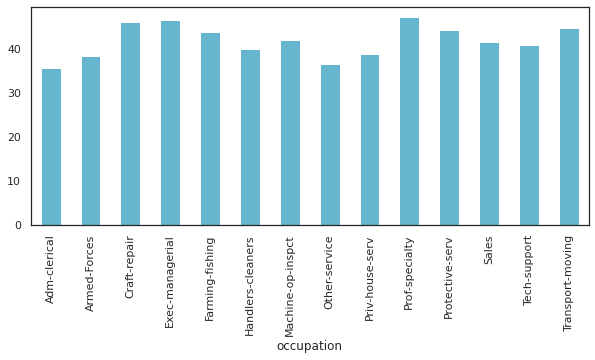

In [ ]:
mean_age["mean"].plot.bar(color = 'c');

What are the mean and standard deviation of age for those who 
earn more than 50K per year (salary feature)?

What are the mean and standard deviation of age for those who earn less than 50K per year?

In [ ]:
income_agg = pd.pivot_table(df1,   index=["income"],  values=['age'], aggfunc=[np.mean, np.std])
income_agg

,mean,std
,age,age
income,,
<=50K,38.924647,14.207877
>50K,48.285549,10.998787


Find the maximum age of men of race.



In [ ]:
pd.pivot_table(df1,  index=["occupation"],  values=['age'],  aggfunc=[max, min, np.mean, np.median, np.std])

,max,min,mean,median,std
,age,age,age,age,age
occupation,,,,,
Adm-clerical,95.873294,15.464482,35.611387,30.043143,13.734469
Armed-Forces,88.763106,17.804658,38.380165,36.846501,14.118314
Craft-repair,100.644389,16.031962,45.974370,46.977778,12.625831
Exec-managerial,98.529927,15.711738,46.520722,47.148499,11.886447
Farming-fishing,96.787578,16.068407,43.814542,44.323501,13.499460
Handlers-cleaners,98.511712,16.139356,39.935617,38.052420,14.196477
Machine-op-inspct,96.696197,16.196940,41.932865,41.050272,13.787483
Other-service,100.855320,15.324212,36.465417,31.034939,14.095143
